In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#initialising styling for seaborn plots
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#Data Pre-processing

In [13]:
df = pd.read_excel('DATASET.xlsx')
df.head()
df = df = df.drop('Unnamed: 0', axis=1)
df.fillna(0, inplace=True)
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])
df.head()


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [14]:
df_test = df.loc[df['year'] == 10]

## BASELINE REGRESSION MODEL

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [17]:
df2 = pd.DataFrame()

In [40]:
X = df.iloc[:, 0:9]
pipe = make_pipeline(StandardScaler(), tree.DecisionTreeRegressor())
X_train = X.loc[df['year'] != 10]
X_test = X.loc[df['year'] == 10]
df_pred = df.loc[df['year'] == 10]
df_pred = df_pred.iloc[:, 9:14]
scores=[]
for i in range(9,14):
  y = df.iloc[:, i]
  y_train = y.loc[df['year'] != 10]
  y_test = y.loc[df['year'] == 10]
  pipe.fit(X_train, y_train)
  df2['para'+ str(i)] = pipe.predict(X_test)
  scores.append(mean_squared_error(df2['para'+ str(i)], y_test, squared = False))

In [27]:
scores

[115.67906897965595,
 107.6709543423852,
 45.21627583072272,
 17.77610756043066,
 0.38013306880617476]

In [30]:
df2

,para9,para10,para11,para12,para13
0,50.6,60.5,57.0,3.0,1.890
1,56.7,239.5,4.0,8.0,0.794
2,75.4,0.0,0.0,14.0,1.487
3,24.8,57.3,61.0,8.0,1.889
4,0.0,261.8,34.0,6.0,1.771
...,...,...,...,...,...
95,154.3,312.5,113.0,13.0,1.556
96,4.8,71.1,24.0,5.0,1.605
97,122.2,62.3,11.0,12.0,0.908
98,89.9,172.1,21.0,15.0,2.122


## EXTRA TREES REGRESSOR

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(bootstrap=False, criterion='squared_error', max_depth=None,
                    max_features='auto', max_leaf_nodes=100,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=1, verbose=0,
                    warm_start=False)

In [34]:
pipe2 = make_pipeline(StandardScaler(), etr)
scores2=[]
for i in range(9,14):
  y = df.iloc[:, i]
  y_train = y.loc[df['year'] != 10]
  y_test = y.loc[df['year'] == 10]
  pipe2.fit(X_train, y_train)
  df2['para'+ str(i)] = pipe2.predict(X_test)
  scores2.append(mean_squared_error(df2['para'+ str(i)], y_test, squared = False))

In [35]:
scores2

[129.17209909086796,
 126.24251100449538,
 56.651393256393995,
 20.13973233104102,
 0.6225999396187737]

## PLOTS

In [49]:
#Selecting random 20 rows
import random
ind = []
for i in range(20):
  ind.append(random.randint(0,99))
ind

[33, 92, 69, 68, 96, 8, 69, 22, 74, 78, 19, 4, 34, 11, 30, 0, 61, 96, 66, 97]

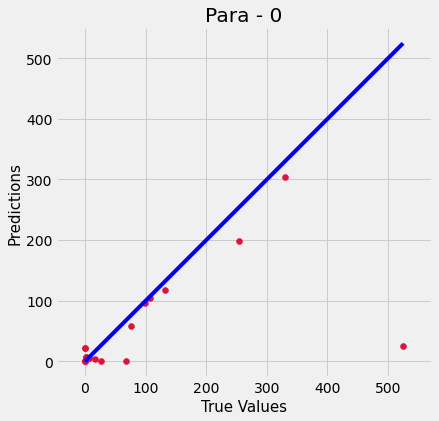

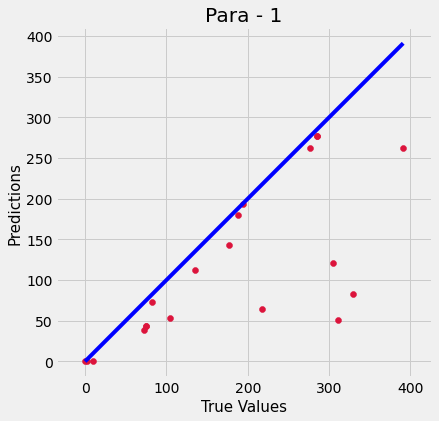

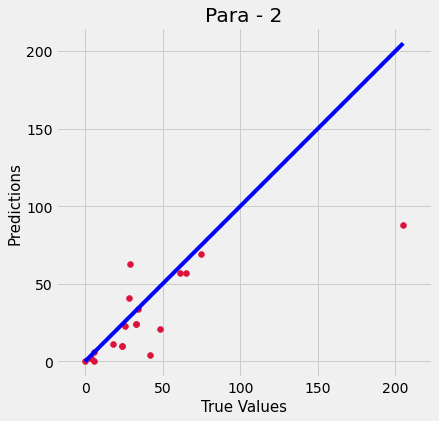

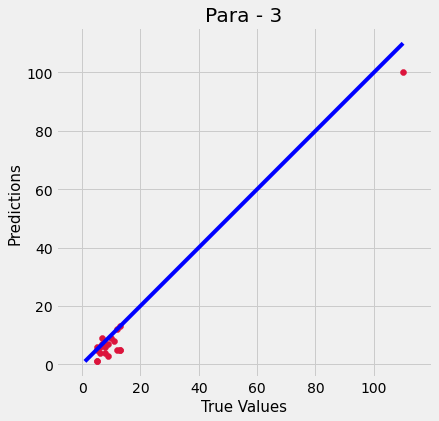

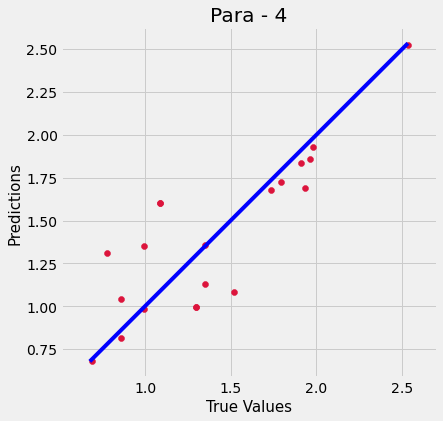

In [50]:
#Scatter plot for random 20 rows out of 100 for each target column
for i in range(5):
  plt.figure(figsize=(6,6))
  true_value = df_pred.iloc[ind, i]
  predicted_value = df2.iloc[ind, i]
  plt.scatter(true_value, predicted_value, c='crimson')
  # plt.yscale('log')
  # plt.xscale('log')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title('Para - ' + str(i))
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()